# **<center>$1 - TheProject : House Prices Prediction$</center>**



## **1.1 Project purpose**

 Our goal is to produce a model which may estimating the price of a given real-estate asset.
  in order to achieve out goak we intend to use the following regression models:

(a) Linear Regression

(b) Decision-Tree

(c) KNN



## **1.2 The Dataset**

(a) Data was taken from Kaggle - https://www.kaggle.com/harlfoxem/housesalesprediction

(b) This dataset provides information about real estate assests features associated with the price of sale in King County, USA




## **1.3 Project  Packages/Modules**

In [7]:
# Main tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# General tools
import re
import sys
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


## **1.4 Mount Google Drive**


In [8]:

if 'google.colab' in sys.modules:
    from google.colab import files, drive

drive.mount('/content/drive/') # Mounting the personal drive - for data access

PATH = '/content/drive/MyDrive/Model/common'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## **1.5 Geographic Illustration**

In [9]:
from skimage import io
import folium 

In [10]:
#Initialization and Visualization of the map
kc_map=folium.Map(location=[47.47, -121.84], zoom_start=8) 
folium.CircleMarker([47.47, -121.84], radius=20, fill_color="#b22222", color="red", ).add_to(kc_map)
kc_map

## **1.6 The Team**

 **Anat Shulman (sanatash@gmail.com)**

**Alon Avramson (alon1122@gmail.com)**

**Nadav Gordon-Bar (nadavgordonbar@gmail.com)**

**Shuky Persky(shukyp@gmail.com)**


 # **<center>$2 - Features  Exploratory$</center>**

## **2.1  Dataset Loading**


In [11]:
file = PATH+ '/dataset/' + 'kc_house_data.csv'
houses = pd.read_csv(file) # Reading the data to df


## **2.2 Initial Review**

In [12]:
houses.head(15) # Debug

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


(-122.51899999999999, -121.315, 47.1559, 47.7776)

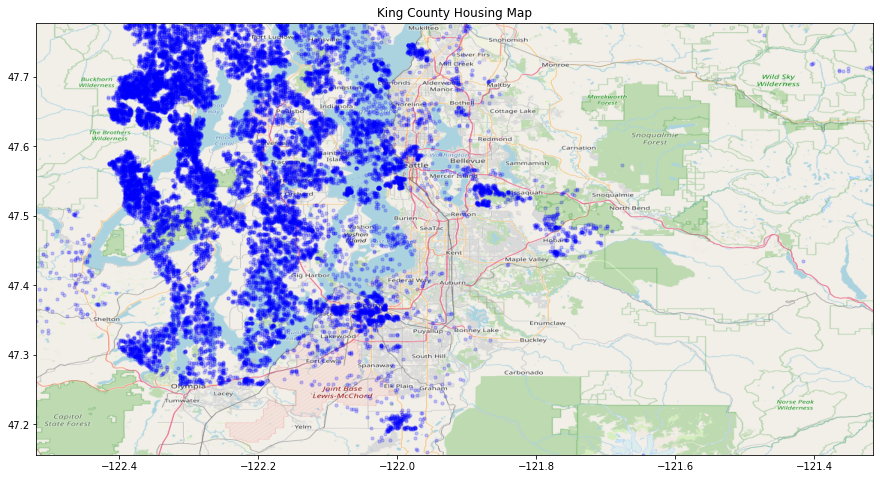

In [13]:
#Lat Lon, draw the price according to distance, put on a geo map
# https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db
# https://www.openstreetmap.org/export#map=9/47.4671/-121.9180
# https://www.openstreetmap.org/#map=9/47.4188/-122.2256
BBox = ((houses.long.min(), houses.long.max(), houses.lat.min(), houses.lat.max()))
display(BBox)

fig, ax = plt.subplots(figsize = (15,20))
ax.scatter(houses.long, houses.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('King County Housing Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
#url = 'https://www.openstreetmap.org/?mlat=47.4188&mlon=-122.2256#map=9/47.4188/-122.2256'
#url = 'https://www.openstreetmap.org/?mlat=houses.lat.min()&mlon=houses.long.min()#map=9/47.4188/-122.2256'
#url = 'https://osm.org/go/WIcXIs--?m='
#url =  'https://osm.org/go/WIdgpo--?m='
#image = io.imread(url)
image = plt.imread(PATH+'/notebook/'+'map.png')
ax.imshow(image, zorder=0, extent = BBox, aspect= 'equal')

## **2.3  Features Explanation**

- $'id'$ - ID value attached to the sale event (no specification)
- $'date'$ - Unclear whether it is the date  of sale or date the asset was registered fro sale (date) (date)
- $'price'$ - House sale price (numeric)
- $'bedrooms'$ - Number of house bedrooms (numeric)
- $'bathrooms'$ - Number of house bathrooms (numeric)
- $'sqft$ $living'$ - Size (Ft**2) of house living region (numeric)
- $'sqft$ $lot'$ - Size (Ft**2) of house yard  area (numeric)
- $'floors'$ - Number of house floors (numeric)
- $'waterfront'$ - Wether or not the house has a waterfront (categorial/ binary)
- $'view'$ -  grade of the house sorrounding view   (categorial/ordinal)
- $'condition'$ -  grade the house condition(categorial/ordinal)
- $'grade'$ - grade of house general condition (categorial/ordinal)
- $'sqft$ $above'$ - Size (Ft**2) of house living area  above the ground(numeric)
- $'sqft$ $basement'$ - Size (Ft**2) of house living area  below the ground(numeric)
- $'yr$ $built'$ - The year of the housebuild (numeric)
- $'yr$ $renovated'$ - The year the house was renovated in (numeric)
- $'zipcode'$ - Zipcode location feature  (no specification, can be categorial/ordinal) 
- $'lat'$ - Geographical latitude location feature  (no specification, can be categorial/ordinal)
- $'long'$ - Geographical longitude location feature (no specification, can be categorial/ordinal)
- $'sqft$ $living15'$ - Size (Ft**2) of house living area of 15 neighboring assets  (numeric)
- $'sqft$ $lot15'$ - Size (Ft**2) of house yard  area of 15 neighboring assets  (numeric)

## **2.4  DataFrame Attributes**

In [14]:
houses.shape

(21613, 21)

In [15]:
# from the below info we can understand that the dataframe is fully populated
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **2.5 Find  DataFrame Empty/Defected Entries**

In [17]:
# data frame columns  # debug
#houses.columns

In [18]:
for col in houses.columns:
    print(f'{col}: {houses[col].isna().sum()} NaNs')

id: 0 NaNs
date: 0 NaNs
price: 0 NaNs
bedrooms: 0 NaNs
bathrooms: 0 NaNs
sqft_living: 0 NaNs
sqft_lot: 0 NaNs
floors: 0 NaNs
waterfront: 0 NaNs
view: 0 NaNs
condition: 0 NaNs
grade: 0 NaNs
sqft_above: 0 NaNs
sqft_basement: 0 NaNs
yr_built: 0 NaNs
yr_renovated: 0 NaNs
zipcode: 0 NaNs
lat: 0 NaNs
long: 0 NaNs
sqft_living15: 0 NaNs
sqft_lot15: 0 NaNs


## **2.6  Drop non-contributing Columns/Featuress**

1 - **id** :  <br>
                         non-contributing Feature

2 - **date**:  <br>
                        to our understanding a date doesn't affect the the sale price

3 - **SqFt living** <br>
                        overlaps other features  which will be used (a) above size (b) basement size

4- **zip code** <br>
                      (a) not sure we have enough coverage of the  problem region<br>
                      (b) will be used on further testing after having 1st cycle models

5 - **Yr_renovation** <br>
                        overlaps condition feature

6 - **lat** and **long**<br> 
                        (a) seems like an  overlap of zip information.<br>
                        (b) not sure we have enough coverage of the  problem region<br>

7 - **VIEW** <br>
                        most entries stamped as Zero, unclear whether anyone borthered filling it


**Further Manipulation:** <br>

1- **Zip Code** <br>
                        will be replaced by price mean for all assts that reside in a give zipcode area

2- **yr_build** <br>
                        will be rplaced by the house  age based on the year of build



In [19]:
# Drop  Features

#keep list of columns for dismiss
dismissed_columns = ['id', 'date', 'sqft_living', 'yr_renovated', 'zipcode', 'lat',  'long', 'view']
used_columns = []

for col  in houses.columns:
    if col not in dismissed_columns:
        used_columns.append(col)

# used_columns #defbug

In [20]:
houses_reduced = houses[used_columns]
houses_reduced

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,7242,2.0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,10000,1.0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,5000,1.0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,8080,1.0,0,3,8,1680,0,1987,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,0,3,8,1530,0,2009,1530,1509
21609,400000.0,4,2.50,5813,2.0,0,3,8,2310,0,2014,1830,7200
21610,402101.0,2,0.75,1350,2.0,0,3,7,1020,0,2009,1020,2007
21611,400000.0,3,2.50,2388,2.0,0,3,8,1600,0,2004,1410,1287


## **2.7 Remove Outliers**

### **2.7.1 Visualize Data (Incl. Outliers)**

In [21]:
#  sns.pairplot(houses_reduced, height=2)

### **2.7.2 Close Look at Outliers**

### **2.7.2.1 bedrooms**

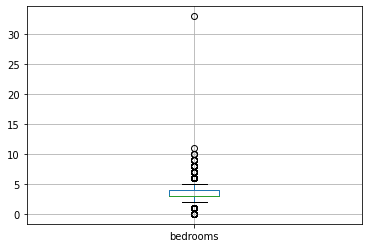

In [22]:
# BEDROOMS
houses_reduced.boxplot(column='bedrooms')

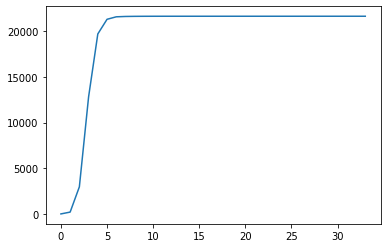

In [23]:
houses_reduced.bedrooms.value_counts().sort_index().cumsum().plot()

### **2.7.2.2 bathrooms**

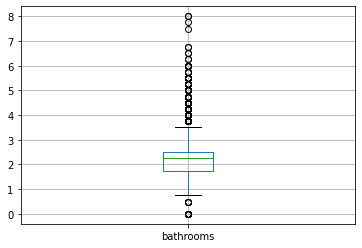

In [24]:
houses_reduced.boxplot(column='bathrooms')

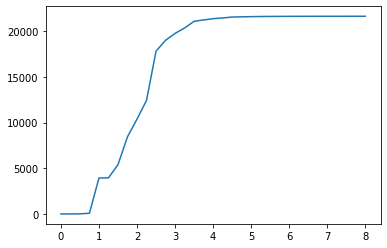

In [25]:
houses_reduced.bathrooms.value_counts().sort_index().cumsum().plot()

### **2.7.2.3 floors**

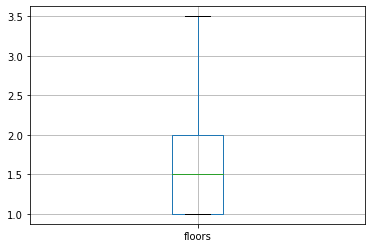

In [26]:
houses_reduced.boxplot(column='floors')

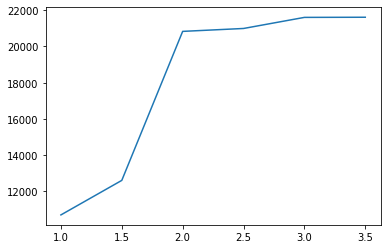

In [27]:
houses_reduced.floors.value_counts().sort_index().cumsum().plot()

### **2.7.2.4 sqft_lot**

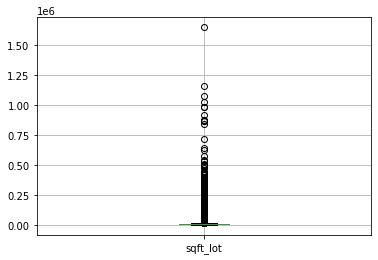

In [28]:
houses_reduced.boxplot(column='sqft_lot')

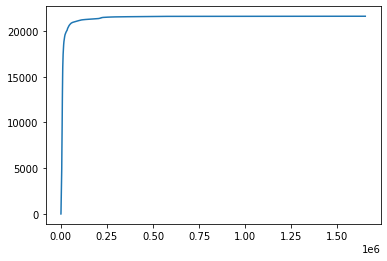

In [29]:
houses_reduced.sqft_lot.value_counts().sort_index().cumsum().plot()

### **2.7.2.5  sqft_above**

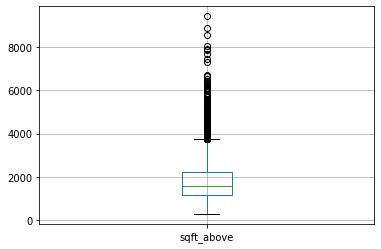

In [30]:
houses_reduced.boxplot(column='sqft_above')

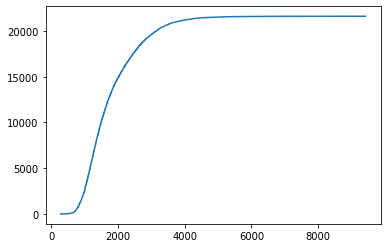

In [31]:
houses_reduced.sqft_above.value_counts().sort_index().cumsum().plot()

### **2.7.2.6 sqft_basement**

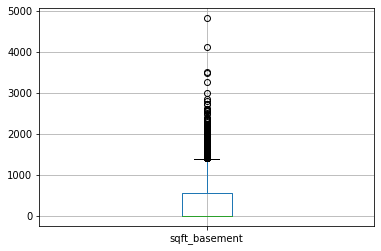

In [32]:
houses_reduced.boxplot(column='sqft_basement')

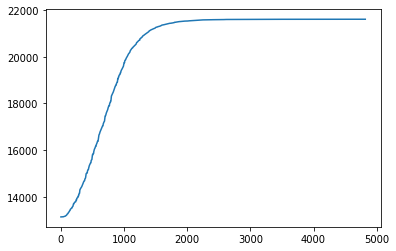

In [33]:
houses_reduced.sqft_basement.value_counts().sort_index().cumsum().plot()

### **2.7.2.7 sqft_living15**

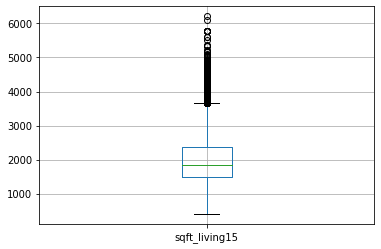

In [34]:
houses_reduced.boxplot(column='sqft_living15')

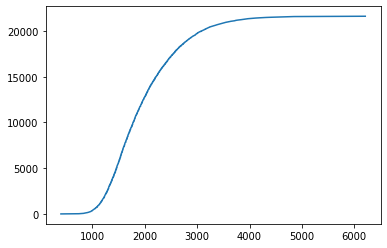

In [35]:
houses_reduced.sqft_living15.value_counts().sort_index().cumsum().plot()

### **2.7.2.8 sqft_lot15**

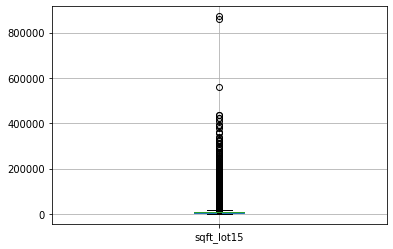

In [36]:
houses_reduced.boxplot(column='sqft_lot15')

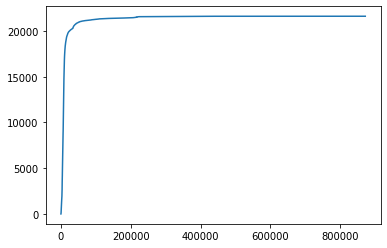

In [37]:
houses_reduced.sqft_lot15.value_counts().sort_index().cumsum().plot()

### **2.7.3 Remove Outliers**


In [38]:
MAX_BEDROOMS = 10 
MAX_BATHROOMS = 5
MAX_SQFT_LOT =  500000
MAX_SQFT_ABOVE =  6000
MAX_SQFT_BASEMENT =  2500
MAX_SQFT_LIVING15 = 5000
MAX_SQFT_LOT15 = 300000

outliers = {'bedrooms':MAX_BEDROOMS, 'bathrooms':MAX_BATHROOMS, 'sqft_lot':MAX_SQFT_LOT,  'sqft_above':MAX_SQFT_ABOVE, 'sqft_basement': MAX_SQFT_BASEMENT,  'sqft_living15':MAX_SQFT_LIVING15, 'sqft_lot15':MAX_SQFT_LOT15}

for key in outliers.keys():
    houses_reduced = houses_reduced.loc[houses_reduced[key] <= outliers[key]]     


### **2.7.4 Final  Data (No Outliers)**

#### **2.7.4.1  Visualize Data**

In [39]:
#sns.pairplot(houses_reduced, height=2)

#### **2.7.4.2 Dataset Info** 

In [40]:
houses_reduced.shape

(21489, 13)

In [41]:
houses_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21489 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21489 non-null  float64
 1   bedrooms       21489 non-null  int64  
 2   bathrooms      21489 non-null  float64
 3   sqft_lot       21489 non-null  int64  
 4   floors         21489 non-null  float64
 5   waterfront     21489 non-null  int64  
 6   condition      21489 non-null  int64  
 7   grade          21489 non-null  int64  
 8   sqft_above     21489 non-null  int64  
 9   sqft_basement  21489 non-null  int64  
 10  yr_built       21489 non-null  int64  
 11  sqft_living15  21489 non-null  int64  
 12  sqft_lot15     21489 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.3 MB


In [42]:
houses_reduced.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.148900e+04,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000,21489.000000
mean,5.329736e+05,3.362930,2.103472,14017.792312,1.492624,0.007260,3.410256,7.642468,1773.990646,288.074131,1970.925869,1978.559402,12182.198241
std,3.381970e+05,0.899152,0.747687,31026.688996,0.539749,0.084895,0.651019,1.152793,795.361269,433.109032,29.364077,670.761660,23012.827207
min,7.500000e+04,0.000000,0.000000,520.000000,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,5036.000000,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,7590.000000,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7609.000000
75%,6.400000e+05,4.000000,2.500000,10578.000000,2.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,2360.000000,10031.000000
max,3.850000e+06,10.000000,5.000000,499571.000000,3.500000,1.000000,5.000000,13.000000,5990.000000,2500.000000,2015.000000,5000.000000,298182.000000


#### **2.7.4.3 Heat Map** 


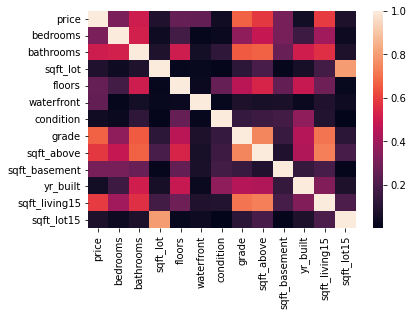

In [43]:
sns.heatmap(houses_reduced.corr().abs())

# **<center>$3 - Features  Engineering$ </center>**

In [44]:
houses_engineered = houses_reduced.copy()
houses_engineered.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,7242,2.0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,10000,1.0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,5000,1.0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,8080,1.0,0,3,8,1680,0,1987,1800,7503


## **3.1 - Transform yr_build feature to asset_age**

In [45]:
# houses_engineered.drop(columns='yr_built' , inplace=True)
# houses_engineered['house_age'] = datetime.now().year- houses['yr_built']
houses_engineered.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,7242,2.0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,10000,1.0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,5000,1.0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,8080,1.0,0,3,8,1680,0,1987,1800,7503


## **3.2 - Transform: Scale zipcode feature to numeric value (log mean price of zip area)**

In [46]:
zipcode_price_med = houses.price.groupby(houses.zipcode).median()
# print(zipcode_price_med) #debug

zipcode_log_price_med = np.log1p(zipcode_price_med)
# zipcode_log_price_med #debug

zip_2_price = houses.zipcode.map(zipcode_log_price_med)

### **3.2.1 Transform Reduced Dataset**

In [47]:
 houses_reduced['zipcode'] = zip_2_price
# houses_reduced.head() #debug

### **3.2.2 Transform Engineered Dataset**

In [48]:
houses_engineered['zipcode'] = zip_2_price
# houses_engineered.head() #debug


## **3.3 -  Transform: Scale price to log scale**

In [49]:
houses_engineered['price'] = np.log1p(houses_engineered.price)
# houses_engineered.head() #debug

## **3.4 -  Transform: Scale sqft_lot to log scale**

In [50]:
houses_engineered['sqft_lot'] = np.log1p(houses_engineered.sqft_lot)
# houses_engineered.head() #debug

## **3.5 -  Transform: Scale sqft_above to log scale**

In [51]:
houses_engineered['sqft_above'] = np.log1p(houses_engineered.sqft_above)
# houses_engineered.head() #debug

## **3.6 -  Transform: Scale sqft_basement to log scale**

In [52]:
houses_engineered['sqft_basement'] = np.log1p(houses_engineered.sqft_basement)
# houses_engineered.head() #debug

## **3.7 -  Transform: Scale sqft_living15 to log scale**

In [53]:
houses_engineered['sqft_living15'] = np.log1p(houses_engineered.sqft_living15)
# houses_engineered.head() #debug

## **3.6 -  Transform: Scale sqft_lot15 to log scale**

In [54]:
houses_engineered['sqft_lot15'] = np.log1p(houses_engineered.sqft_lot15)
# houses_engineered.head() #debug

## **3.7 - Rename feature names to reflect scaling**


In [55]:
houses_engineered.rename(columns={'price':'log_price','zipcode':'zip_log_med_price',  'sqft_lot':'sqft_lot_log',   'sqft_above': 'sqft_above_log',  'sqft_basement':	'sqft_basement_log', 'sqft_living15':'sqft_living15_log',  'sqft_lot15': 'sqft_lot15_log'   }, inplace=True)
houses_engineered.head()


,log_price,bedrooms,bathrooms,sqft_lot_log,floors,waterfront,condition,grade,sqft_above_log,sqft_basement_log,yr_built,sqft_living15_log,sqft_lot15_log,zip_log_med_price
0,12.309987,3,1.00,8.639588,1.0,0,3,7,7.074117,0.000000,1955,7.201171,8.639588,12.536376
1,13.195616,3,2.25,8.887791,2.0,0,3,7,7.682943,5.993961,1951,7.433075,8.941153,12.959847
2,12.100718,2,1.00,9.210440,1.0,0,3,6,6.647688,0.000000,1933,7.908755,8.995041,13.005832
3,13.311331,4,3.00,8.517393,1.0,0,5,7,6.957497,6.814543,1965,7.215975,8.517393,13.102061
4,13.142168,3,2.00,8.997271,1.0,0,3,8,7.427144,0.000000,1987,7.496097,8.923191,13.372345


# **<center>$4 - The Models$**

## **4.1 - Import Packages & Modules**

In [68]:
!pip install pydot

In [69]:
# For transformations
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.preprocessing import FunctionTransformer

# For transformations and predictions
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error

# For validation
from sklearn.model_selection import train_test_split as split

# For curve fitting
from scipy.optimize import curve_fit

# For the tree visualization 
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

## **4.2 - Split train/test, Features(X)/Target(y)**

In [70]:
# split engineered data frame
train_logged,test_logged = split(houses_engineered, train_size=0.7, random_state=12345)

train_X_logged = train_logged.drop(columns='log_price', inplace=False)
train_y_logged = train_logged.log_price

test_X_logged = test_logged.drop(columns='log_price', inplace=False)
test_y_logged = test_logged.log_price


## **4.3 - Linera Regression**

### **4.3.1 - Model Create/Train**

In [71]:
LR_model  = LinearRegression()
LR_model.fit(train_X_logged, train_y_logged)

print(f"The LR model intercept is: {LR_model.intercept_}")
print(f"The LR model coefficients are: {LR_model.coef_}")

The LR model intercept is: 5.84549056126045
The LR model coefficients are: [-0.01971196  0.06354929  0.02969079  0.02688236  0.6584656   0.03478341
  0.12003359  0.35658209  0.02623516 -0.00318079  0.08991354 -0.04301763
  0.69544522]


### **4.3.2 - Assess Model (train)**

In [72]:
#predict
LR_train_pred_y = LR_model.predict(train_X_logged)
#len(LR_train_pred_y)  #debug

# assess
LR_train_rmse = np.sqrt(mean_squared_error(train_y_logged, LR_train_pred_y))
print(f"RMSE = {LR_train_rmse:.2f}")

RMSE = 0.21


### **4.3.3 - Validate Model (test)**

In [73]:
#predict
LR_test_pred_y = LR_model.predict( test_X_logged)
#len(LR_test_pred_y) #debug

# validate
LR_test_rmse = np.sqrt(mean_squared_error(test_y_logged, LR_test_pred_y))
print(f"RMSE = {LR_test_rmse:.2f}")


RMSE = 0.21


### **4.3.4 - Visualize Model Validation (test)**

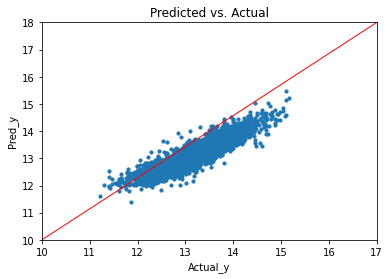

In [74]:
# construct dataframe
LR_validate_df = pd.DataFrame({'Actual_y': test_y_logged, 'Pred_y': LR_test_pred_y})

ax = LR_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[10,17], ylim=[10,18], title='Predicted vs. Actual')
ax.plot(np.linspace(10,17,2), np.linspace(10, 18,2), linewidth=1, color='r')


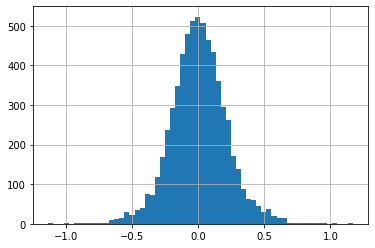

In [75]:
(LR_validate_df['Actual_y'] - LR_validate_df['Pred_y']).hist(bins=60)

## **4.4 - DecisionTree**

In [203]:
DT_MAX_DEPTH = 7
DT_MIN_SAMPLES_LEAF = 7
DT_MIN_SAMPLES_SPLIT=3
DT_MAX_LEAF_NODES = 140

### **4.4.1 - Model Create/Train**

In [204]:
DT_model = DecisionTreeRegressor(max_depth=DT_MAX_DEPTH, min_samples_leaf=DT_MIN_SAMPLES_LEAF, min_samples_split=DT_MIN_SAMPLES_SPLIT, max_leaf_nodes=DT_MAX_LEAF_NODES)
DT_model.fit(train_X_logged, train_y_logged)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=140,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### **4.4.2 Observe The Model**

#### **4.4.2.1 - Visualize the Tree**

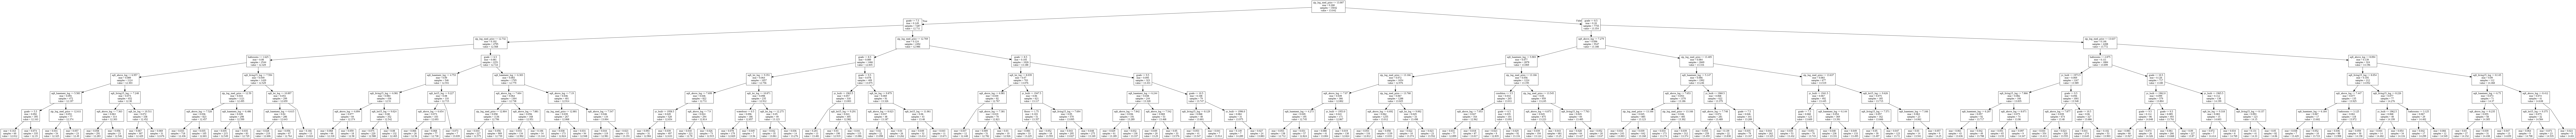

In [205]:
dot_data = StringIO()  
export_graphviz(DT_model, out_file=dot_data, feature_names=train_X_logged.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=600) 

#### **4.4.2.2 - Feature Importance**

In [206]:
train_X_logged.head()

,bedrooms,bathrooms,sqft_lot_log,floors,waterfront,condition,grade,sqft_above_log,sqft_basement_log,yr_built,sqft_living15_log,sqft_lot15_log,zip_log_med_price
21056,4,2.25,8.177797,2.0,0,3,7,7.384610,0.00000,2010,7.473637,8.214194,12.742569
489,5,2.50,9.159152,2.0,0,4,8,8.131825,0.00000,1977,8.033009,9.313077,13.254270
4591,4,2.50,9.896010,2.0,0,3,9,7.758333,0.00000,1993,7.565793,9.644717,12.834684
9694,3,1.50,9.289891,1.0,0,4,8,7.333676,0.00000,1955,7.626083,9.289891,14.453410
5524,3,2.50,8.870803,1.0,0,4,7,7.259116,6.23637,1961,7.378384,9.030376,12.834684


In [207]:
for feature, importance in zip(train_X_logged.columns, DT_model.feature_importances_):
    print(f'{feature:12}: {importance}')

bedrooms    : 0.0
bathrooms   : 0.02168417241062724
sqft_lot_log: 0.0077753776770589115
floors      : 0.0004679476400398859
waterfront  : 0.0010880778616050688
condition   : 0.00031866843411536104
grade       : 0.2941058121553629
sqft_above_log: 0.04997284593415629
sqft_basement_log: 0.022954748808088555
yr_built    : 0.013225568216873597
sqft_living15_log: 0.009510965167655462
sqft_lot15_log: 0.0024016311743701867
zip_log_med_price: 0.5764941845200465


### **4.4.2 - Assess Model (train)**

In [208]:
#predict
DT_train_pred_y = DT_model.predict(train_X_logged)
#len(DT_train_pred_y)  #debug

# assess
DT_train_rmse = np.sqrt(mean_squared_error(train_y_logged, DT_train_pred_y))
print(f"RMSE = {DT_train_rmse:.2f}")

RMSE = 0.22


### **4.4.3 - Validate Model (test)**

In [209]:
#predict
DT_test_pred_y = DT_model.predict(test_X_logged)
#len(DT_train_pred_y)  #debug

# validate
DT_test_rmse = np.sqrt(mean_squared_error(test_y_logged, DT_test_pred_y))
print(f"RMSE = {DT_test_rmse:.2f}")

RMSE = 0.24


### **4.4.4 - Visualize Model Validation (test)**

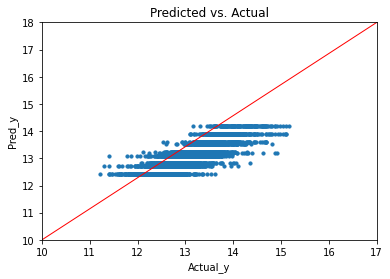

In [86]:
# construct dataframe
DT_validate_df = pd.DataFrame({'Actual_y': test_y_logged, 'Pred_y': DT_test_pred_y})

ax = DT_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[10,17], ylim=[10,18], title='Predicted vs. Actual')
ax.plot(np.linspace(10,17,2), np.linspace(10, 18,2), linewidth=1, color='r')

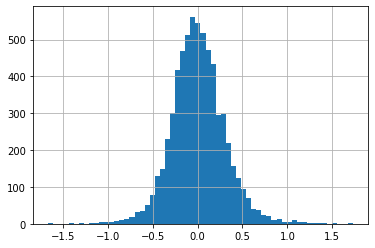

In [87]:
(DT_validate_df['Actual_y'] -DT_validate_df['Pred_y']).hist(bins=60)

### **4.4.5 Drop of low-significance columns**

In [153]:
cols_of_no_importance = ['bedrooms', 'sqft_lot_log', 'floors', 'waterfront', 'condition', 'sqft_basement_log', 'yr_built', 'sqft_living15_log', 'sqft_lot15_log']

train_y_logged_reduced = train_y_logged.drop(columns=cols_of_no_importance , inplace=False)
train_X_logged_reduced = train_X_logged.drop(columns=cols_of_no_importance , inplace=False)
test_y_logged_reduced = test_y_logged.drop(columns=cols_of_no_importance , inplace=False)
test_X_logged_reduced = test_X_logged.drop(columns=cols_of_no_importance , inplace=False)

DT_model_auto = DecisionTreeRegressor(max_depth=DT_MAX_DEPTH, min_samples_leaf=DT_MIN_SAMPLES_LEAF, min_samples_split=DT_MIN_SAMPLES_SPLIT, max_leaf_nodes=DT_MAX_LEAF_NODES)
DT_model_auto.fit(train_X_logged_reduced, train_y_logged_reduced)

#====================================================================================

#predict
DT_train_pred_y = DT_model_auto.predict(train_X_logged_reduced)
#len(DT_train_pred_y)  #debug

# assess
DT_train_rmse = np.sqrt(mean_squared_error(train_y_logged_reduced, DT_train_pred_y))
print(f"RMSE Train= {DT_train_rmse:.2f}")

#====================================================================================

#predict
DT_test_pred_y = DT_model_auto.predict(test_X_logged_reduced)
#len(DT_train_pred_y)  #debug

# validate
DT_test_rmse = np.sqrt(mean_squared_error(test_y_logged_reduced, DT_test_pred_y))
print(f"RMSE Test= {DT_test_rmse:.2f}")


RMSE Train= 0.29
RMSE Test= 0.30


### **4.4.6 Automation: Find optimal max_leaf_nodes Value**

#### **4.4.6.1 - Run The Process**

In [200]:
# set range boundary
MAX_MAX_LEAFS_VAL = 250

# create a model
DT_model_auto = DecisionTreeRegressor(max_depth=DT_MAX_DEPTH, min_samples_leaf=DT_MIN_SAMPLES_LEAF, min_samples_split=DT_MIN_SAMPLES_SPLIT, max_leaf_nodes=DT_MAX_LEAF_NODES)
 
# init structures to be used bu atomation
DT_RMSE_train = []
DT_RMSE_test = []

# traverse thru selected range of values
for leaf_val in range(2, MAX_MAX_LEAFS_VAL): 
    
    # set model param leaf_val
    DT_model_auto.max_leaf_nodes = leaf_val
    
    # train the model
    DT_model_auto.fit(train_X_logged,  train_y_logged)    

    # predict on train set
    train_y_pred_auto = DT_model_auto.predict(train_X_logged)
    DT_RMSE_train.append(mse(train_y_pred_auto, train_y_logged) ** 0.5)

    # predict on test 
    test_y_pred_auto = DT_model_auto.predict(test_X_logged)
    DT_RMSE_test.append(mse(test_y_pred_auto, test_y_logged) ** 0.5)
  

#### **4.4.6.2 - Visualize Process Results**

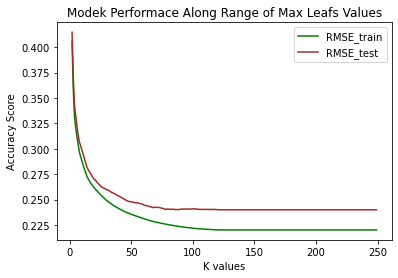

In [202]:
max_leaf_vals = [x for x in range(2, MAX_MAX_LEAFS_VAL)]
plt.plot(max_leaf_vals , DT_RMSE_train, color='green',label='RMSE_train')
plt.plot(max_leaf_vals, DT_RMSE_test, color='brown',label='RMSE_test')

plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Model Performace Along Range of Max Leafs Values')
plt.legend()


## **4.5 - KNN**

### **4.5.1 - Model Create/Train**

In [186]:
KNN_model = KNeighborsRegressor(n_neighbors=12)
KNN_model.fit(train_X_logged,  train_y_logged)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='uniform')

### **4.5.2 - Assess Model (train)**

In [187]:
#predict
KNN_train_pred_y = KNN_model.predict(train_X_logged)
#len(KNN_train_pred_y)  #debug

# assess
KNN_train_rmse = np.sqrt(mean_squared_error(train_y_logged, KNN_train_pred_y))
print(f"RMSE = {KNN_train_rmse:.2f}")

RMSE = 0.26


### **4.5.3 -Validate Model (test)**

In [188]:
#predict
KNN_test_pred_y = KNN_model.predict(test_X_logged)
#len(KNN_train_pred_y)  #debug

# validate
KNN_test_rmse = np.sqrt(mean_squared_error(test_y_logged, KNN_test_pred_y))
print(f"RMSE = {KNN_test_rmse:.2f}")

RMSE = 0.28


### **4.5.4 - Visualize Model Validation (test)**

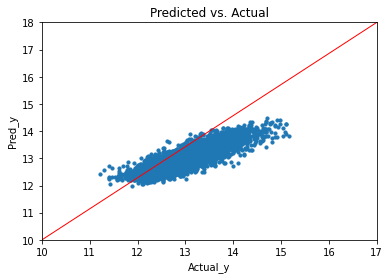

In [189]:
# construct dataframe
KNN_validate_df = pd.DataFrame({'Actual_y': test_y_logged, 'Pred_y': KNN_test_pred_y})

ax = KNN_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[10,17], ylim=[10,18], title='Predicted vs. Actual')
ax.plot(np.linspace(10,17,2), np.linspace(10, 18,2), linewidth=1, color='r')

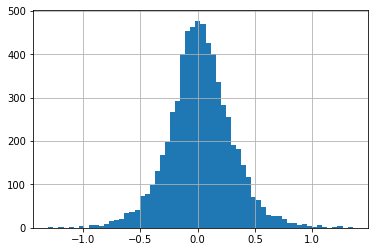

In [190]:
(KNN_validate_df['Actual_y'] - KNN_validate_df['Pred_y']).hist(bins=60)

### **4.5.5 - Automation: Find optimal K (Neigbours) Value**

####  **4.5.5.1 - Run The Process**

In [183]:
# set range boundary
MAX_K_VAL = 25

# create a model
KNN_model_auto = KNeighborsRegressor(n_neighbors=5)

# init structures to be used bu atomation
RMSE_train = []
RMSE_test = []

# traverse thru selected range of values
for k in range(1, MAX_K_VAL): 
    
    # set model param K
    KNN_model_auto.n_neighbors=k                    

    # train the model
    KNN_model_auto.fit(train_X_logged,  train_y_logged)    

    # train
    train_y_pred_auto = KNN_model_auto.predict(train_X_logged)
    RMSE_train.append(mse(train_y_pred_auto, train_y_logged) ** 0.5)

    # test 
    test_y_pred_auto = KNN_model_auto.predict(test_X_logged)
    RMSE_test.append(mse(test_y_pred_auto, test_y_logged) ** 0.5)
  

#### **4.5.5.2 - Visualize Process Results**

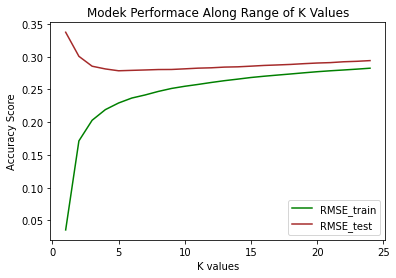

In [172]:
k_vals = [x for x in range(1,  MAX_K_VAL)]
plt.plot(k_vals , RMSE_train, color='green',label='RMSE_train')
plt.plot(k_vals, RMSE_test, color='brown',label='RMSE_test')

plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Model Performace Along Range of K Values')
plt.legend()


# **<center>$5 - The Models - Improvement$**

## **5.1 - Split dataset to  train/test, Features(X)/Target(y)**

In [88]:
# split reduced data frame
train_imprv, test_imprv = split(houses_reduced, train_size=0.7, random_state=12345)

# debug
# train_imprv.head(4)
# test_imprv.head(4)

# select columns to be scaled
#scaled_columns = ['price' ,  'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
non_scaled_columns =['bedrooms',	'bathrooms',	'floors',	'waterfront',	'condition',	'grade',	'yr_built',	'zipcode']

# prepare DF for scaling with columns to scale
train_imprv_2scale = train_imprv.drop(columns=non_scaled_columns, inplace=False)
test_imprv_2scale = test_imprv.drop(columns=non_scaled_columns, inplace=False)


In [1]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler

### **5.1.1 - MaxAbs Scaling**

In [210]:
# Maxabs scaling

# calculate transformation coef 
train_imprv_maxabs_scale_ = MaxAbsScaler().fit(train_imprv_2scale)
# print(f'train data maxabs scale: {train_imprv_maxabs_scale_.scale_}')
test_imprv_maxabs_scale_ = MaxAbsScaler().fit(test_imprv_2scale)
# print(f'test data maxabs scale: {test_imprv_maxabs_scale_.scale_}')

# transform selected columns
train_maxabs_np_scaled = train_imprv_maxabs_scale_.transform(train_imprv_2scale)
test_maxabs_np_scaled = train_imprv_maxabs_scale_.transform(test_imprv_2scale)

# organize as dataframe
train_maxabs_scaled  = pd.DataFrame(train_maxabs_np_scaled, columns=train_imprv_2scale.columns, index=train_imprv_2scale.index)
test_maxabs_scaled  = pd.DataFrame(test_maxabs_np_scaled, columns=test_imprv_2scale.columns, index=test_imprv_2scale.index)

# get full copy of DF
train_imprv_maxabs = train_imprv.copy()
test_imprv_maxabs = test_imprv.copy()

#update DF with scaled values 
for col in train_maxabs_scaled.columns:    
    train_imprv_maxabs[col] = train_maxabs_scaled[col]

for col in test_maxabs_scaled.columns:    
    test_imprv_maxabs[col] = test_maxabs_scaled[col]

# split to  Features(X) and Target(y) for both train and test data
train_X_maxabs = train_imprv_maxabs.drop(columns='price', inplace=False)
train_y_maxabs =train_imprv_maxabs.price

test_X_maxabs = test_imprv_maxabs.drop(columns='price', inplace=False)
test_y_maxabs = test_imprv_maxabs.price


### **5.1.2 - MinMax Scaling**

In [211]:
# Maxabs scaling

# calculate transformation coef 
train_imprv_minmax_scale_ = MinMaxScaler().fit(train_imprv_2scale)
# print(f'train data minmax scale: {train_imprv_minmax_scale_.scale_}')
test_imprv_minmax_scale_ = MinMaxScaler().fit(test_imprv_2scale)
# print(f'test data minmax  scale: {test_imprv_minmax_scale_.scale_}')

# transform selected columns
train_minmax_np_scaled = train_imprv_minmax_scale_.transform(train_imprv_2scale)
test_minmax_np_scaled = train_imprv_minmax_scale_.transform(test_imprv_2scale)

# organize as dataframe
train_minmax_scaled  = pd.DataFrame(train_minmax_np_scaled, columns=train_imprv_2scale.columns, index=train_imprv_2scale.index)
test_minmax_scaled  = pd.DataFrame(test_minmax_np_scaled, columns=test_imprv_2scale.columns, index=test_imprv_2scale.index)

# get full copy of DF
train_imprv_minmax = train_imprv.copy()
test_imprv_minmax = test_imprv.copy()

#update DF with scaled values 
for col in train_minmax_scaled.columns:    
    train_imprv_minmax[col] = train_minmax_scaled[col]

for col in test_minmax_scaled.columns:    
    test_imprv_minmax[col] = test_minmax_scaled[col]

# split to  Features(X) and Target(y) for both train and test data
train_X_minmax = train_imprv_minmax.drop(columns='price', inplace=False)
train_y_minmax =train_imprv_minmax.price

test_X_minmax = test_imprv_minmax.drop(columns='price', inplace=False)
test_y_minmax = test_imprv_minmax.price


## **5.2 - Linear Regression (Maxabs)**

### **5.2.1 - Model Create/Train**

In [223]:
LR_model  = LinearRegression()
LR_model.fit(train_X_maxabs, train_y_maxabs)

print(f"The LR model intercept is: {LR_model.intercept_}")
print(f"The LR model coefficients are: {LR_model.coef_}")

The LR model intercept is: -0.14934155802163854
The LR model coefficients are: [-0.00782792  0.0099259   0.02069105  0.00036961  0.18470462  0.00493069
  0.02082649  0.2475396   0.09835668 -0.00060776  0.00234717 -0.03664372
  0.09448041]


### **5.2.2 - Assess Model (train)**

In [224]:
#predict
LR_train_pred_y = LR_model.predict(train_X_maxabs)
#len(LR_train_pred_y)  #debug

# assess
LR_train_rmse = np.sqrt(mean_squared_error(train_y_maxabs, LR_train_pred_y))
print(f"RMSE = {LR_train_rmse:.2f}")

RMSE = 0.04


### **5.2.3 - Validate Model (test)**

In [214]:
#predict
LR_test_pred_y = LR_model.predict( test_X_maxabs)
#len(LR_test_pred_y) #debug

# validate
LR_test_rmse = np.sqrt(mean_squared_error(test_y_maxabs, LR_test_pred_y))
print(f"RMSE = {LR_test_rmse:.2f}")


RMSE = 0.04


### **5.2.4 - Visualize Model Validation (test)**

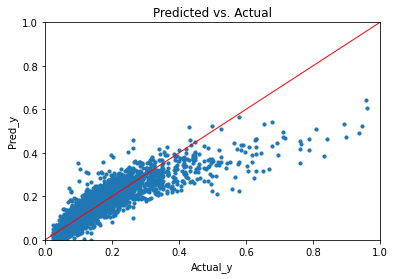

In [215]:
# construct dataframe
LR_validate_df = pd.DataFrame({'Actual_y': test_y_maxabs, 'Pred_y': LR_test_pred_y})

ax = LR_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[0,1], ylim=[0,1], title='Predicted vs. Actual')
ax.plot(np.linspace(0,1,2), np.linspace(0, 1,2), linewidth=1, color='r')


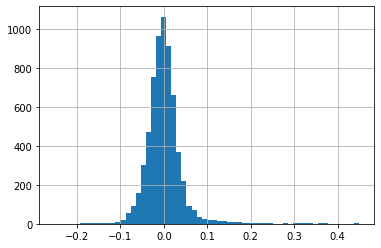

In [216]:
(LR_validate_df['Actual_y'] - LR_validate_df['Pred_y']).hist(bins=60)

## **5.3 - Linear Regression (MinMax)**

### **5.3.1 - Model Create/Train**

In [225]:
LR_model  = LinearRegression()
LR_model.fit(train_X_minmax, train_y_maxabs)

print(f"The LR model intercept is: {LR_model.intercept_}")
print(f"The LR model coefficients are: {LR_model.coef_}")

The LR model intercept is: -0.13392013885497137
The LR model coefficients are: [-0.00782792  0.0099259   0.02066736  0.00036961  0.18470462  0.00493069
  0.02082649  0.23224917  0.09835668 -0.00060776  0.00215987 -0.03656372
  0.09448041]


### **5.3.2 - Assess Model (train)**

In [226]:
#predict
LR_train_pred_y = LR_model.predict(train_X_minmax)
#len(LR_train_pred_y)  #debug

# assess
LR_train_rmse = np.sqrt(mean_squared_error(train_y_minmax, LR_train_pred_y))
print(f"RMSE = {LR_train_rmse:.2f}")

RMSE = 0.05


### **5.3.3 - Validate Model (test)**

In [227]:
#predict
LR_test_pred_y = LR_model.predict( test_X_minmax)
#len(LR_test_pred_y) #debug

# validate
LR_test_rmse = np.sqrt(mean_squared_error(test_y_minmax, LR_test_pred_y))
print(f"RMSE = {LR_test_rmse:.2f}")


RMSE = 0.05


### **5.3.4 - Visualize Model Validation (test)**

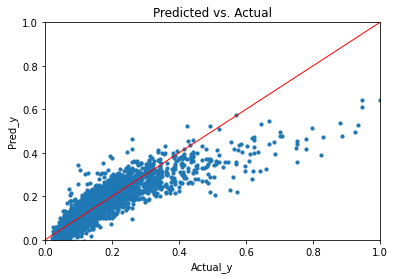

In [104]:
# construct dataframe
LR_validate_df = pd.DataFrame({'Actual_y': test_y_maxabs, 'Pred_y': LR_test_pred_y})

ax = LR_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[0,1], ylim=[0,1], title='Predicted vs. Actual')
ax.plot(np.linspace(0,1,2), np.linspace(0, 1,2), linewidth=1, color='r')


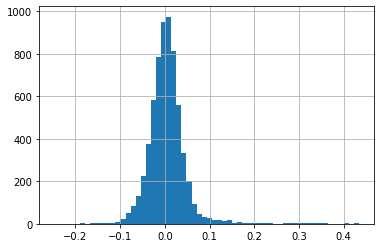

In [105]:
(LR_validate_df['Actual_y'] - LR_validate_df['Pred_y']).hist(bins=60)

## **5.4 - DecisionTree (MaxAbs)**

In [228]:
DT_MAXABS_MAX_DEPTH = 7
DT_MAXABS_MIN_SAMPLES_LEAF = 7
DT_MAXABS_MIN_SAMPLES_SPLIT=3
DT_MAXABS_MAX_LEAF_NODES = 10

### **5.4.1 - Model Create/Train**

In [229]:
DT_model = DecisionTreeRegressor(max_depth=DT_MAXABS_MAX_DEPTH, min_samples_leaf=DT_MAXABS_MIN_SAMPLES_LEAF, min_samples_split=DT_MAXABS_MIN_SAMPLES_SPLIT, max_leaf_nodes=DT_MAXABS_MAX_LEAF_NODES)
DT_model.fit(train_X_maxabs, train_y_maxabs)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### **5.4.2 Observe The Model**

#### **5.4.2.1 - Visualize the Tree**

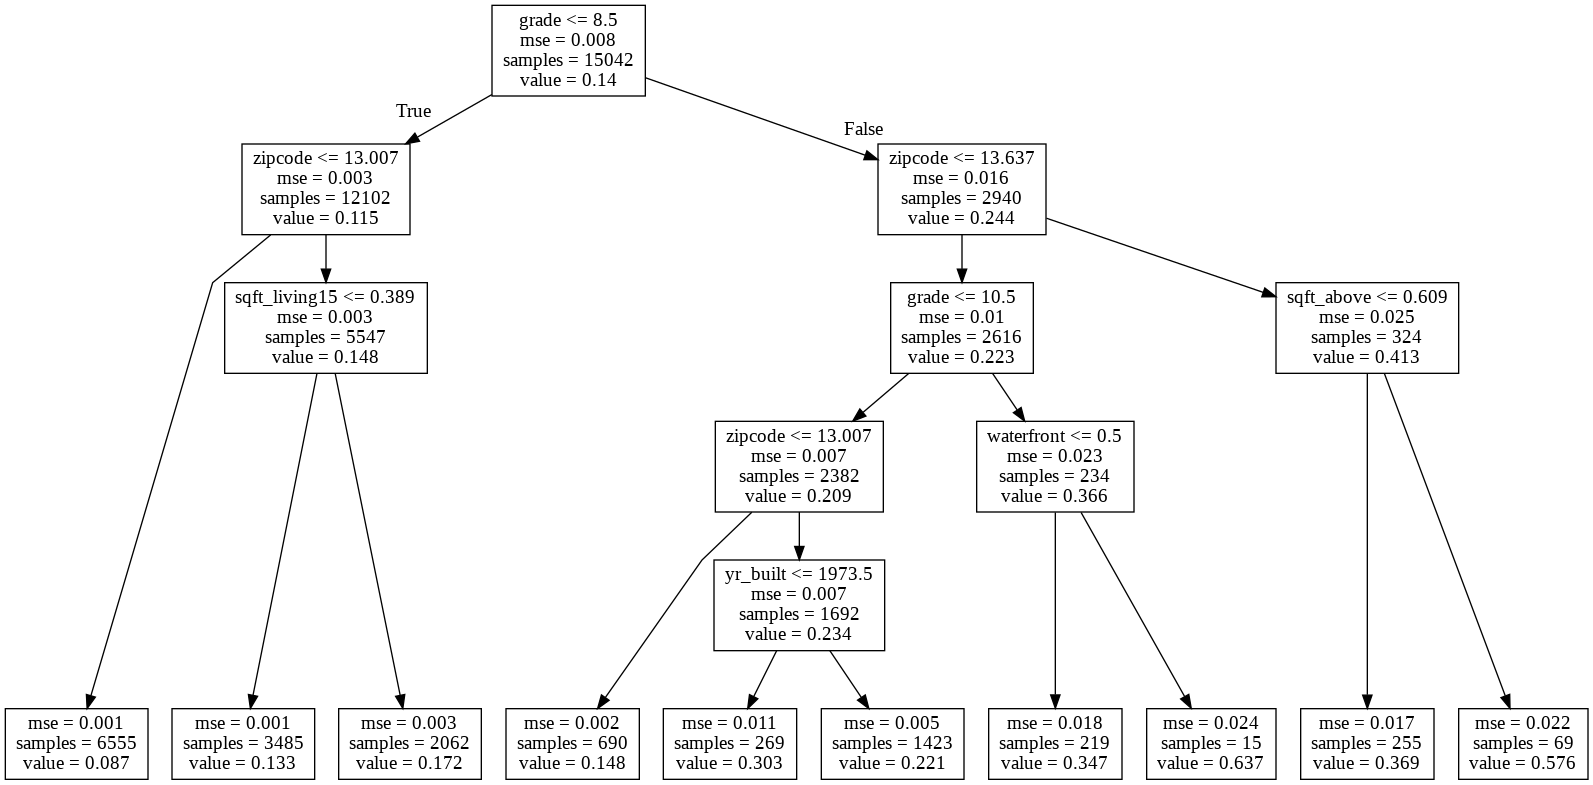

In [230]:
dot_data = StringIO()  
export_graphviz(DT_model, out_file=dot_data, feature_names=train_X_maxabs.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=600) 

#### **5.4.2.2 - Feature Importance**

In [231]:
train_X_maxabs.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,zipcode
21056,4,2.25,0.007126,2.0,0,3,7,0.268781,0.000,2010,0.352,0.012382,12.742569
489,5,2.50,0.019016,2.0,0,4,8,0.567613,0.000,1977,0.616,0.037162,13.254270
4591,4,2.50,0.039734,2.0,0,3,9,0.390651,0.000,1993,0.386,0.051777,12.834684
9694,3,1.50,0.021673,1.0,0,4,8,0.255426,0.000,1955,0.410,0.036310,14.453410
5524,3,2.50,0.014252,1.0,0,4,7,0.237062,0.204,1961,0.320,0.028010,12.834684


In [232]:
for feature, importance in zip(train_X_maxabs.columns, DT_model.feature_importances_):
    print(f'{feature:12}: {importance}')

bedrooms    : 0.0
bathrooms   : 0.0
sqft_lot    : 0.0
floors      : 0.0
waterfront  : 0.015376465698279246
condition   : 0.0
grade       : 0.5838846589177612
sqft_above  : 0.030423507703397475
sqft_basement: 0.0
yr_built    : 0.019843334452545127
sqft_living15: 0.025971903537027857
sqft_lot15  : 0.0
zipcode     : 0.32450012969098907


### **5.4.2 - Assess Model (train)**

In [233]:
#predict
DT_train_pred_y = DT_model.predict(train_X_maxabs)
#len(DT_train_pred_y)  #debug

# assess
DT_train_rmse = np.sqrt(mean_squared_error(train_y_maxabs, DT_train_pred_y))
print(f"RMSE = {DT_train_rmse:.2f}")

RMSE = 0.05


### **5.4.3 - Validate Model (test)**

In [234]:
#predict
DT_test_pred_y = DT_model.predict(test_X_maxabs)
#len(DT_train_pred_y)  #debug

# validate
DT_test_rmse = np.sqrt(mean_squared_error(test_y_maxabs, DT_test_pred_y))
print(f"RMSE = {DT_test_rmse:.2f}")

RMSE = 0.06


### **5.4.4 - Visualize Model Validation (test)**

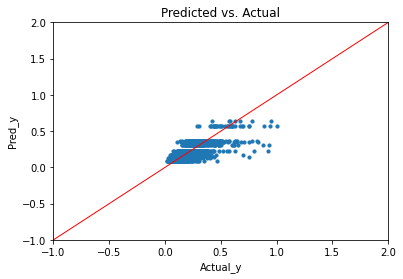

In [118]:
# construct dataframe
DT_validate_df = pd.DataFrame({'Actual_y': test_y_maxabs, 'Pred_y': DT_test_pred_y})

ax = DT_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[-1,2], ylim=[-1,2], title='Predicted vs. Actual')
ax.plot(np.linspace(-1,2,2), np.linspace(-1,2,2), linewidth=1, color='r')

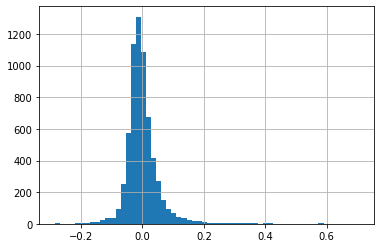

In [119]:
(DT_validate_df['Actual_y'] -DT_validate_df['Pred_y']).hist(bins=60)

## **5.5 - DecisionTree (MinMax)**

In [235]:
DT_MINMAX_MAX_DEPTH = 7
DT_MINMAX_MIN_SAMPLES_LEAF = 7
DT_MINMAX_MIN_SAMPLES_SPLIT=3
DT_MINMAX_MAX_LEAF_NODES = 10

### **5.5.1 - Model Create/Train**

In [236]:
DT_model = DecisionTreeRegressor(max_depth=DT_MINMAX_MAX_DEPTH, min_samples_leaf=DT_MINMAX_MIN_SAMPLES_LEAF, min_samples_split=DT_MINMAX_MIN_SAMPLES_SPLIT, max_leaf_nodes=DT_MINMAX_MAX_LEAF_NODES)
DT_model.fit(train_X_minmax, train_y_minmax)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### **5.5.2 Observe The Model**

#### **5.4.2.1 - Visualize the Tree**

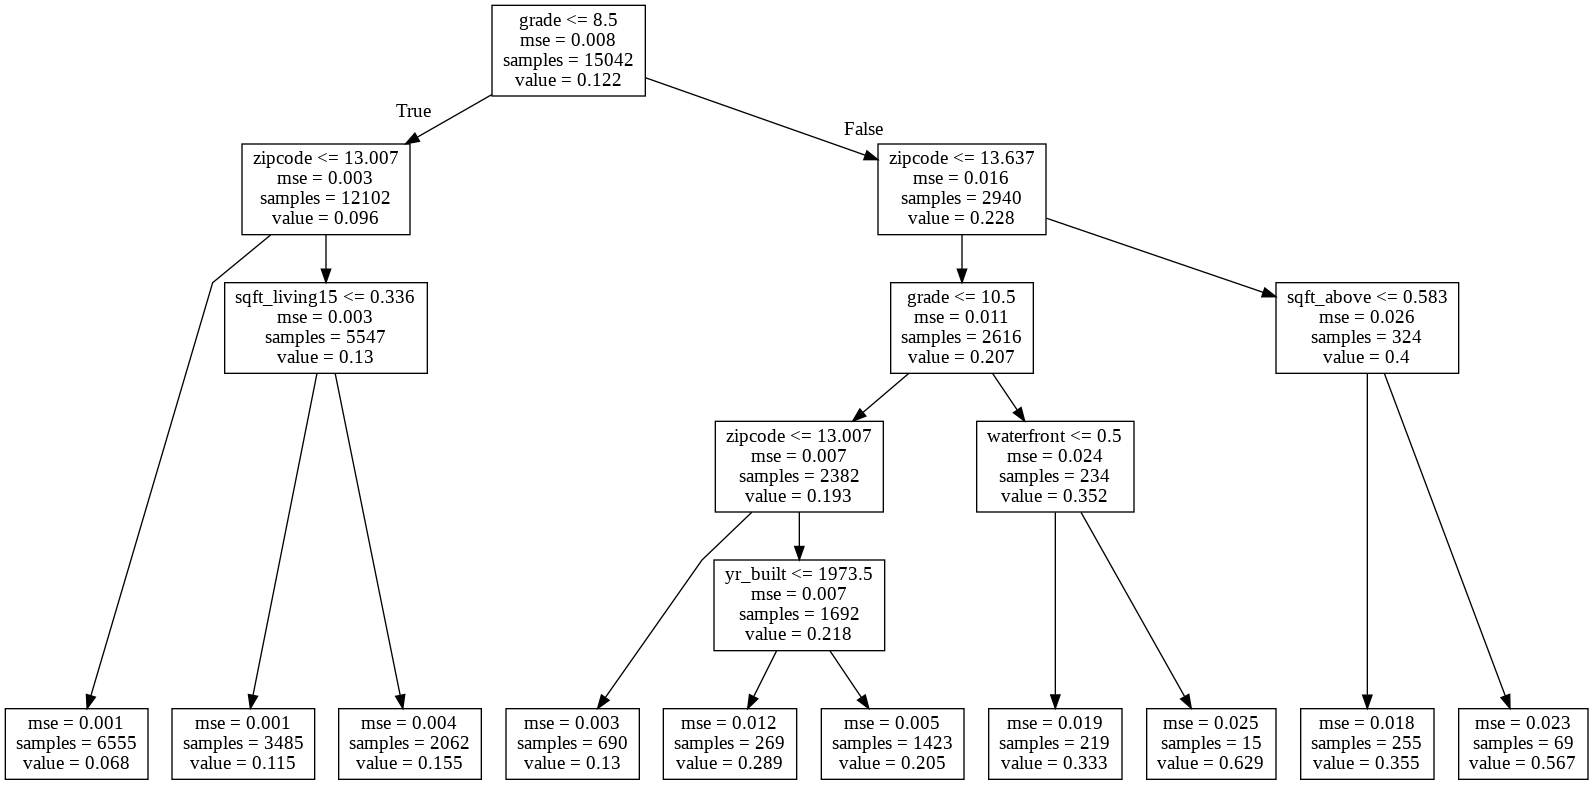

In [237]:
dot_data = StringIO()  
export_graphviz(DT_model, out_file=dot_data, feature_names=train_X_minmax.columns, leaves_parallel=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
Image(graph.create_png(), width=600) 

#### **5.5.2.2 - Feature Importance**

In [238]:
train_X_minmax.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,zipcode
21056,4,2.25,0.005988,2.0,0,3,7,0.220641,0.000,2010,0.295805,0.010221,12.742569
489,5,2.50,0.017892,2.0,0,4,8,0.539146,0.000,1977,0.582699,0.035055,13.254270
4591,4,2.50,0.038633,2.0,0,3,9,0.350534,0.000,1993,0.332754,0.049702,12.834684
9694,3,1.50,0.020551,1.0,0,4,8,0.206406,0.000,1955,0.358835,0.034201,14.453410
5524,3,2.50,0.013122,1.0,0,4,7,0.186833,0.204,1961,0.261030,0.025883,12.834684


In [239]:
for feature, importance in zip(train_X_minmax.columns, DT_model.feature_importances_):
    print(f'{feature:12}: {importance}')

bedrooms    : 0.0
bathrooms   : 0.0
sqft_lot    : 0.0
floors      : 0.0
waterfront  : 0.015376465698281156
condition   : 0.0
grade       : 0.5838846589177072
sqft_above  : 0.030423507703399775
sqft_basement: 0.0
yr_built    : 0.019843334452539833
sqft_living15: 0.02597190353705464
sqft_lot15  : 0.0
zipcode     : 0.3245001296910174


### **5.5.2 - Assess Model (train)**

In [240]:
#predict
DT_train_pred_y = DT_model.predict(train_X_minmax)
#len(DT_train_pred_y)  #debug

# assess
DT_train_rmse = np.sqrt(mean_squared_error(train_y_minmax, DT_train_pred_y))
print(f"RMSE = {DT_train_rmse:.2f}")

RMSE = 0.05


### **5.5.3 - Validate Model (test)**

In [241]:
#predict
DT_test_pred_y = DT_model.predict(test_X_minmax)
#len(DT_train_pred_y)  #debug

# validate
DT_test_rmse = np.sqrt(mean_squared_error(test_y_minmax, DT_test_pred_y))
print(f"RMSE = {DT_test_rmse:.2f}")

RMSE = 0.06


### **5.5.4 - Visualize Model Validation (test)**

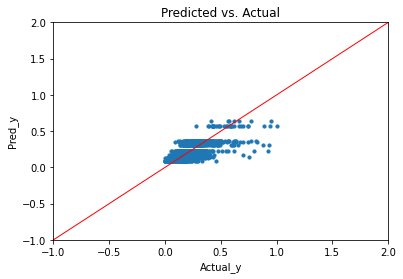

In [131]:
# construct dataframe
DT_validate_df = pd.DataFrame({'Actual_y': test_y_minmax, 'Pred_y': DT_test_pred_y})

ax = DT_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[-1,2], ylim=[-1,2], title='Predicted vs. Actual')
ax.plot(np.linspace(-1,2,2), np.linspace(-1,2,2), linewidth=1, color='r')

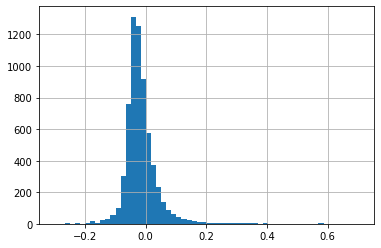

In [132]:
(DT_validate_df['Actual_y'] -DT_validate_df['Pred_y']).hist(bins=60)

## **5.6 - KNN (MaxAbs)**

### **5.6.1 - Model Create/Train**

In [243]:
KNN_model = KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(train_X_maxabs,  train_y_maxabs)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### **5.6.2 - Assess Model (train)**

In [244]:
#predict
KNN_train_pred_y = KNN_model.predict(train_X_maxabs)
#len(KNN_train_pred_y)  #debug

# assess
KNN_train_rmse = np.sqrt(mean_squared_error(train_y_maxabs, KNN_train_pred_y))
print(f"RMSE = {KNN_train_rmse:.2f}")

RMSE = 0.04


### **5.6.3 -Validate Model (test)**

In [245]:
#predict
KNN_test_pred_y = KNN_model.predict(test_X_maxabs)
#len(KNN_train_pred_y)  #debug

# validate
KNN_test_rmse = np.sqrt(mean_squared_error(test_y_maxabs, KNN_test_pred_y))
print(f"RMSE = {KNN_test_rmse:.2f}")

RMSE = 0.05


### **5.6.4 - Visualize Model Validation (test)**

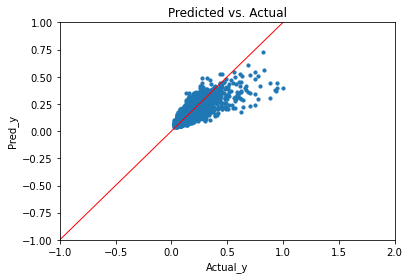

In [137]:
# construct dataframe
KNN_validate_df = pd.DataFrame({'Actual_y': test_y_maxabs, 'Pred_y': KNN_test_pred_y})

ax = KNN_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[-1,2], ylim=[-1,1], title='Predicted vs. Actual')
ax.plot(np.linspace(-1,1,2), np.linspace(-1,1,2), linewidth=1, color='r')

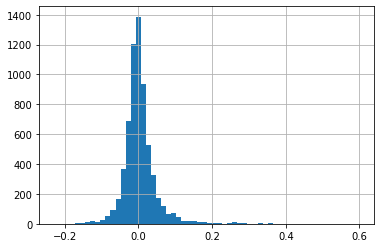

In [139]:
(KNN_validate_df['Actual_y'] - KNN_validate_df['Pred_y']).hist(bins=60)

## **5.7 - KNN (MinMax)**

### **5.7.1 - Model Create/Train**

In [138]:
KNN_model = KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(train_X_minmax,  train_y_minmax)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### **5.7.2 - Assess Model (train)**

In [140]:
#predict
KNN_train_pred_y = KNN_model.predict(train_X_minmax)
#len(KNN_train_pred_y)  #debug

# assess
KNN_train_rmse = np.sqrt(mean_squared_error(train_y_minmax, KNN_train_pred_y))
print(f"RMSE = {KNN_train_rmse:.2f}")

RMSE = 0.04


### **5.7.3 -Validate Model (test)**

In [142]:
#predict
KNN_test_pred_y = KNN_model.predict(test_X_minmax)
#len(KNN_train_pred_y)  #debug

# validate
KNN_test_rmse = np.sqrt(mean_squared_error(test_y_minmax, KNN_test_pred_y))
print(f"RMSE = {KNN_test_rmse:.2f}")

RMSE = 0.05


### **5.7.4 - Visualize Model Validation (test)**

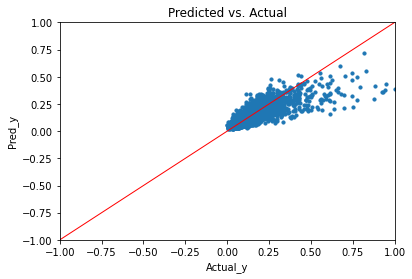

In [144]:
# construct dataframe
KNN_validate_df = pd.DataFrame({'Actual_y': test_y_minmax, 'Pred_y': KNN_test_pred_y})

ax = KNN_validate_df.plot('Actual_y', 'Pred_y', kind='scatter', s=10, xlim=[-1,1], ylim=[-1,1], title='Predicted vs. Actual')
ax.plot(np.linspace(-1,1,2), np.linspace(-1, 1,2), linewidth=1, color='r')

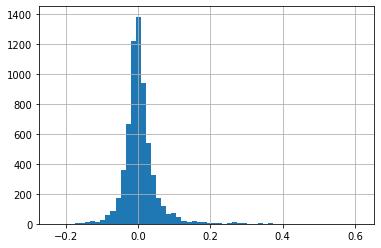

In [145]:
(KNN_validate_df['Actual_y'] - KNN_validate_df['Pred_y']).hist(bins=60)